In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

# Conf

In [2]:
!pip3 install seaborn

     |████████████████████████████████| 285 kB 828 kB/s eta 0:00:01


In [3]:
import dask

dask.__version__

'2021.06.2'

In [4]:
import dask.dataframe as dd
from lib.data import construct
import lib.data.preprocess as preprocess
import lib.data.features.timefeatures as feat

In [5]:
from imp import reload
    # Do some things.
# single = reload(single)
construct = reload(construct)
feat = reload(feat)

In [6]:

import lib.input.single_stg as single
from lib.models.single_stage import training
from imp import reload

# EDA

In [7]:

dc, db, _ = construct.read_recsys_data(False)
db.describe()

/hd/anaconda3/envs/master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


session_id       item_id         price      quantity
count  1.150753e+06  1.150753e+06  1.150753e+06  1.150753e+06
mean   5.914902e+06  2.204533e+08  1.423527e+03  6.460865e-01
std    3.347447e+06  4.897305e+07  4.651549e+03  1.144520e+00
min    1.100000e+01  2.145073e+08  0.000000e+00  0.000000e+00
25%    2.958503e+06  2.147167e+08  0.000000e+00  0.000000e+00
50%    5.968063e+06  2.148350e+08  0.000000e+00  0.000000e+00
75%    8.824554e+06  2.148498e+08  1.046000e+03  1.000000e+00
max    1.156212e+07  1.178838e+09  3.349980e+05  3.000000e+01

In [8]:
train_df, test_df = construct.load_constructed('00')
test_df.shape, train_df.shape

/hd/anaconda3/envs/master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


((3308991, 14), (29694953, 14))

In [9]:
test_df.shape, train_df.shape

((3308991, 14), (29694953, 14))

In [12]:
def test_f(x):
    
    print(x)
    input()
    print(x[-3:])
    input()
train_df.groupby('session_id').apply(test_f)

   session_id                         timestamp    item_id category  label  \
0           2  2014-04-07 13:56:37.614000+00:00  214662742        0  False   
1           2  2014-04-07 13:57:19.373000+00:00  214662742        0  False   
2           2  2014-04-07 13:58:37.446000+00:00  214825110        0  False   
3           2  2014-04-07 13:59:50.710000+00:00  214757390        0  False   
4           2  2014-04-07 14:00:38.247000+00:00  214757407        0  False   
5           2  2014-04-07 14:02:36.889000+00:00  214551617        0  False   

   item_id_prob  item_qty_rank  item_clicks_rank  weekday  day  hour  month  \
0          0.00           11.0            3490.0        1    8    14      5   
1          0.00           11.0            3490.0        1    8    14      5   
2          0.04            1.0             431.0        1    8    14      5   
3          0.04            4.0             875.0        1    8    14      5   
4          0.00            NaN             335.0        1 

   session_id                         timestamp    item_id category  label  \
3           2  2014-04-07 13:59:50.710000+00:00  214757390        0  False   
4           2  2014-04-07 14:00:38.247000+00:00  214757407        0  False   
5           2  2014-04-07 14:02:36.889000+00:00  214551617        0  False   

   item_id_prob  item_qty_rank  item_clicks_rank  weekday  day  hour  month  \
3          0.04            4.0             875.0        1    8    14      5   
4          0.00            NaN             335.0        1    8    15      5   
5          0.00           47.0            9833.0        1    8    15      5   

   week  price_dist_avg  
3    16             0.0  
4    16             0.0  
5    16             0.0  


   session_id                         timestamp    item_id category  label  \
6           3  2014-04-02 13:17:46.940000+00:00  214716935        0  False   
7           3  2014-04-02 13:26:02.515000+00:00  214774687        0  False   
8           3  2014-04-02 13:30:12.318000+00:00  214832672        0  False   

   item_id_prob  item_qty_rank  item_clicks_rank  weekday  day  hour  month  \
6          0.00          415.0           27758.0        3    3    14      5   
7          0.08           46.0            3171.0        3    3    14      5   
8          0.00           38.0            3104.0        3    3    14      5   

   week  price_dist_avg  
6    15             0.0  
7    15             0.0  
8    15             0.0  


KeyboardInterrupt: Interrupted by user

In [11]:
train_df.head(20)

session_id                         timestamp    item_id category  label  \
0            2  2014-04-07 13:56:37.614000+00:00  214662742        0  False   
1            2  2014-04-07 13:57:19.373000+00:00  214662742        0  False   
2            2  2014-04-07 13:58:37.446000+00:00  214825110        0  False   
3            2  2014-04-07 13:59:50.710000+00:00  214757390        0  False   
4            2  2014-04-07 14:00:38.247000+00:00  214757407        0  False   
5            2  2014-04-07 14:02:36.889000+00:00  214551617        0  False   
6            3  2014-04-02 13:17:46.940000+00:00  214716935        0  False   
7            3  2014-04-02 13:26:02.515000+00:00  214774687        0  False   
8            3  2014-04-02 13:30:12.318000+00:00  214832672        0  False   
9            4  2014-04-07 12:09:10.948000+00:00  214836765        0  False   
10           4  2014-04-07 12:26:25.416000+00:00  214706482        0  False   
11           6  2014-04-06 16:58:20.848000+00:00  214701242        0  False   
12           6  2014-04-06 17:02:26.976000+00:00  214826623        0  False   
13           7  2014-04-02 06:38:53.104000+00:00  214826835        0  False   
14           7  2014-04-02 06:39:05.854000+00:00  214826715        0  False   
15           9  2014-04-06 11:26:24.127000+00:00  214576500        0  False   
16           9  2014-04-06 11:28:54.654000+00:00  214576500        0  False   
17           9  2014-04-06 11:29:13.479000+00:00  214576500        0  False   
18          11  2014-04-03 10:44:35.672000+00:00  214821275        0   True   
19          11  2014-04-03 10:45:01.674000+00:00  214821275        0   True   

    item_id_prob  item_qty_rank  item_clicks_rank  weekday  day  hour  month  \
0           0.00           11.0            3490.0        1    8    14      5   
1           0.00           11.0            3490.0        1    8    14      5   
2           0.04            1.0             431.0        1    8    14      5   
3           0.04            4.0             875.0        1    8    14      5   
4           0.00            NaN             335.0        1    8    15      5   
5           0.00           47.0            9833.0        1    8    15      5   
6           0.00          415.0           27758.0        3    3    14      5   
7           0.08           46.0            3171.0        3    3    14      5   
8           0.00           38.0            3104.0        3    3    14      5   
9           0.04           11.0            2751.0        1    8    13      5   
10          0.04            1.0             828.0        1    8    13      5   
11          0.00            6.0            1979.0        7    7    17      5   
12          0.00          184.0           17446.0        7    7    18      5   
13          0.00          607.0           13852.0        3    3     7      5   
14          0.08          529.0            6722.0        3    3     7      5   
15          0.00           22.0            1537.0        7    7    12      5   
16          0.00           22.0            1537.0        7    7    12      5   
17          0.00           22.0            1537.0        7    7    12      5   
18          0.00           82.0            3809.0        4    4    11      5   
19          0.00           82.0            3809.0        4    4    11      5   

    week  
0     16  
1     16  
2     16  
3     16  
4     16  
5     16  
6     15  
7     15  
8     15  
9     16  
10    16  
11    15  
12    15  
13    15  
14    15  
15    15  
16    15  
17    15  
18    15  
19    15

In [91]:
train_df = train_df.drop('timestamp',axis=1)

In [9]:
test_df.head()

session_id                         timestamp    item_id  category  label  \
0          31  2014-04-01 08:36:04.146000+00:00  214537967       296  False   
1          31  2014-04-01 08:38:17.758000+00:00  214537967       296  False   
2          92  2014-04-04 07:11:52.265000+00:00  214717007       296  False   
3          92  2014-04-04 07:12:10.903000+00:00  214717003       296  False   
4          92  2014-04-04 07:13:06.319000+00:00  214716928       296  False   

   item_id_prob  item_rank  weekday  day  hour  month  week  price_dist_avg  \
0          0.12      167.0        2    2     9      5    15             0.0   
1          0.12      167.0        2    2     9      5    15             0.0   
2          0.08      223.0        5    5     8      5    15             0.0   
3          0.04      925.0        5    5     8      5    15             0.0   
4          0.16      500.0        5    5     8      5    15             0.0   

   dwelltime  
0          0  
1        133  
2          0  
3         18  
4         55

<AxesSubplot:>

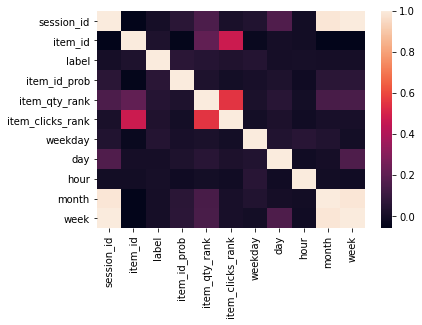

In [12]:
import seaborn as sns
    
sns.heatmap(test_df.corr())

<AxesSubplot:>

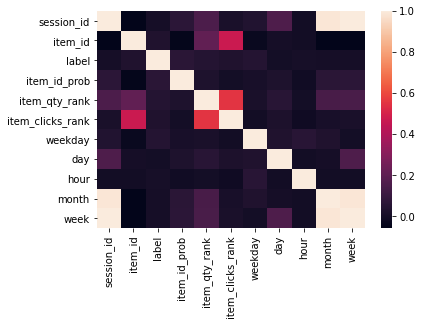

In [13]:
import seaborn as sns
    
sns.heatmap(train_df.corr())

In [14]:
train_df.corr()['label']

session_id          0.000416
item_id             0.028379
label               1.000000
item_id_prob        0.061186
item_qty_rank       0.043137
item_clicks_rank    0.029624
weekday             0.042414
day                -0.003514
hour                0.007090
month               0.001701
week               -0.000523
Name: label, dtype: float64

In [15]:
test_df.corr()['label']

session_id          0.002297
item_id             0.027730
label               1.000000
item_id_prob        0.059237
item_qty_rank       0.045180
item_clicks_rank    0.032082
weekday             0.044394
day                 0.001833
hour                0.004157
month               0.002802
week                0.001320
Name: label, dtype: float64

<AxesSubplot:>

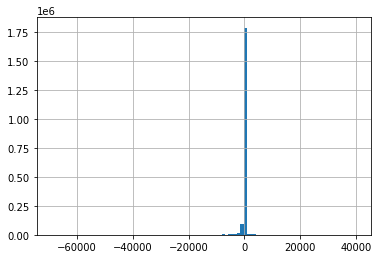

In [97]:
train_df.price_dist_avg.hist(bins=100)

<AxesSubplot:>

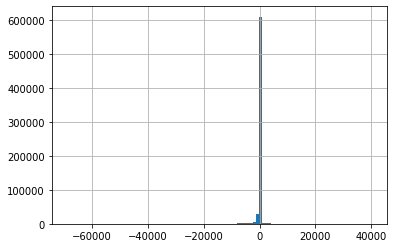

In [98]:
test_df.price_dist_avg.hist(bins=100)

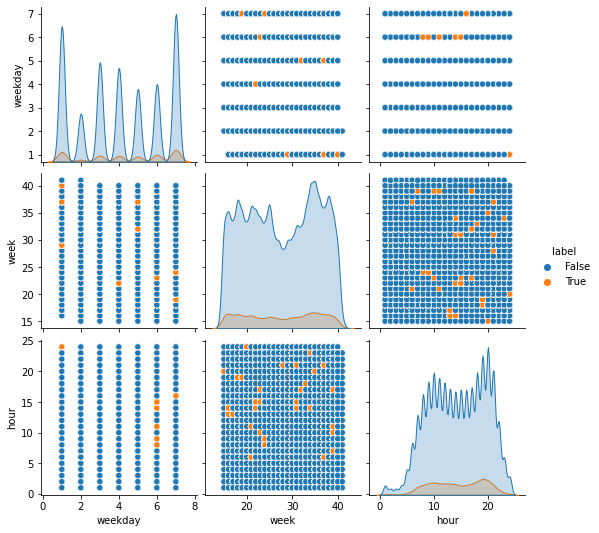

In [102]:
sns.pairplot(test_df[['weekday','week','hour','label']],hue='label')

<AxesSubplot:>

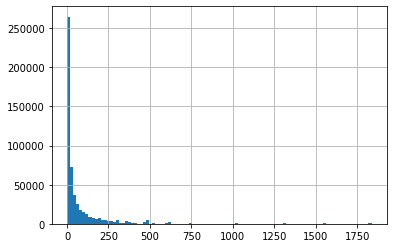

In [100]:
test_df['item_rank'].hist(bins=100)

In [68]:
arr = test_df[test_df.item_rank <= 750].copy()

In [85]:
import pandas as pd
arr['item_rank_test'] = pd.qcut(arr['item_rank'],50,duplicates='drop').astype(str).astype('category').cat.codes
arr

session_id                         timestamp    item_id category  \
0               73  2014-04-03 13:35:46.173000+00:00  214826705        0   
1               73  2014-04-03 13:36:58.538000+00:00  214826705        0   
7              127  2014-04-05 15:13:45.268000+00:00  214512416        0   
8              127  2014-04-05 15:15:06.385000+00:00  214512416        0   
9              163  2014-04-01 19:02:28.976000+00:00  214674568        0   
...            ...                               ...        ...      ...   
662185    11299757  2014-09-28 18:11:19.582000+00:00  214853072        S   
662186    11299757  2014-09-28 18:19:12.507000+00:00  214853072        S   
662187    11299757  2014-09-28 18:24:42.186000+00:00  214853072        S   
662188    11299757  2014-09-28 18:26:41.383000+00:00  214853072        S   
662189    11299757  2014-09-28 18:52:19.460000+00:00  214853072        S   

        label  item_id_prob  item_rank  weekday  day  hour  month  week  \
0       False          0.08      182.0        4    4    14      5    15   
1       False          0.08      182.0        4    4    14      5    15   
7       False          0.12       12.0        6    6    16      5    15   
8       False          0.12       12.0        6    6    16      5    15   
9       False          0.12        2.0        2    2    20      5    15   
...       ...           ...        ...      ...  ...   ...    ...   ...   
662185  False          0.00      256.0        7   29    19     10    40   
662186  False          0.00      256.0        7   29    19     10    40   
662187  False          0.00      256.0        7   29    19     10    40   
662188  False          0.00      256.0        7   29    19     10    40   
662189  False          0.00      256.0        7   29    19     10    40   

        price_dist_avg  item_rank_test  
0              -1465.0               9  
1              -1465.0               9  
7                  0.0               3  
8                  0.0               3  
9                  0.0               0  
...                ...             ...  
662185             0.0              15  
662186             0.0              15  
662187             0.0              15  
662188             0.0              15  
662189             0.0              15  

[520872 rows x 14 columns]

In [76]:
arr.corr()['label']

session_id       -0.009546
item_id           0.016258
label             1.000000
item_id_prob      0.081084
item_rank         0.040338
weekday           0.038700
day              -0.000330
hour              0.006342
month            -0.008277
week             -0.009719
price_dist_avg    0.004919
Name: label, dtype: float64

<AxesSubplot:xlabel='item_rank_test,label'>

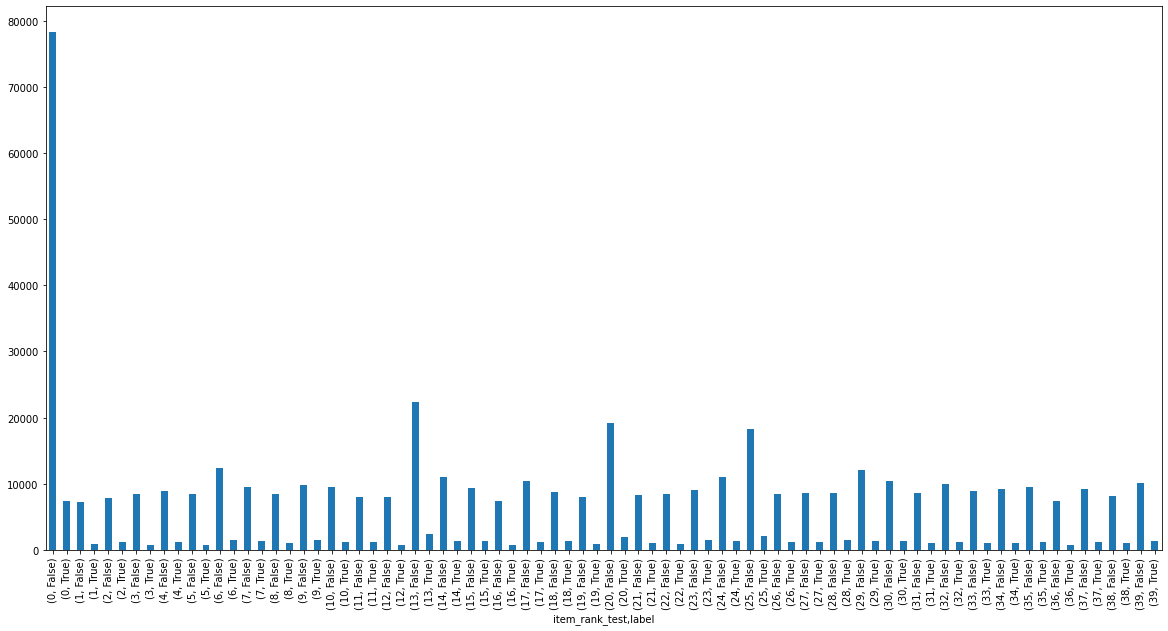

In [86]:

arr.groupby('item_rank_test').label.value_counts().iloc[:100].plot.bar(figsize=(20,10))

## Histogram

### Dwelltime

<AxesSubplot:>

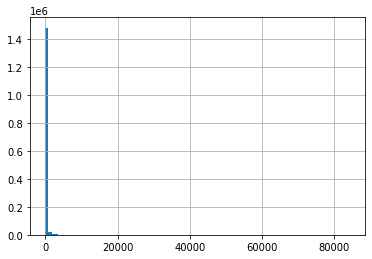

In [23]:
train_df.dwelltime.hist(bins=100)

<AxesSubplot:>

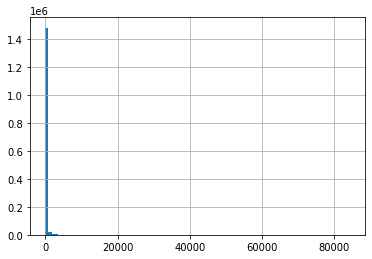

In [24]:
test_df.dwelltime.hist(bins=100)

### time features

<AxesSubplot:>

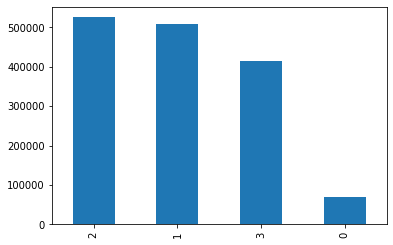

In [25]:
train_df.hour.value_counts().plot.bar()

<AxesSubplot:>

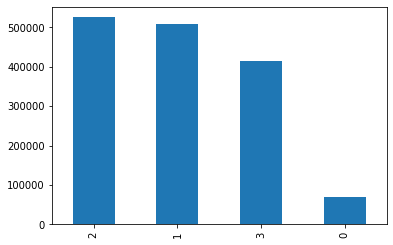

In [26]:
test_df.hour.value_counts().plot.bar()

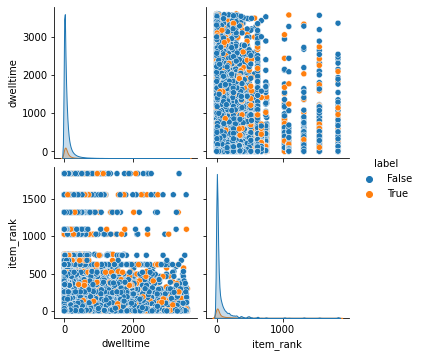

In [33]:
import seaborn as sns

sns.pairplot(test_df[['dwelltime','item_rank','label']], hue = 'label')

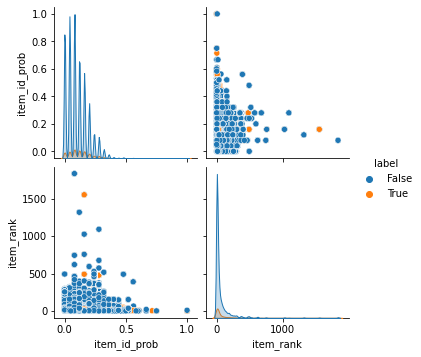

In [35]:
import seaborn as sns

sns.pairplot(test_df[['item_id_prob','item_rank','label']], hue = 'label')